In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('appl_1980_2014.csv')

In [3]:
dataset.shape

(8465, 7)

In [4]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [5]:
X = dataset.iloc[:,1:5].values
y = dataset.iloc[:,-1].values

In [6]:
std = StandardScaler()
X = std.fit_transform(X)

In [7]:
y = y.reshape(-1,1)
y = std.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [10]:
def cost_function(X,y,b):
    loss = np.sum(((X.dot(b)) - y) ** 2) / n
    return loss

In [11]:
def gradient_descent(X,y,epochs,alpha):
    b = np.zeros(X.shape[1])
    errors = []
    for i in range(epochs):
        pred = np.dot(X,b)
        loss = pred - y
        grad_b = (2/n) * X.T.dot(loss)
        b = b - alpha * grad_b
        err = cost_function(X,y,b)
        errors.append(err)
    return errors,b

In [12]:
epochs = 150
alpha = 0.01
n = len(X)

In [13]:
err,b = gradient_descent(x_train,y_train.flatten(),epochs,alpha)

In [14]:
err[:10]

[0.6673438413560447,
 0.5939392474683752,
 0.5290815890607696,
 0.47177569534365094,
 0.42114226921137654,
 0.37640439537655196,
 0.3368756194429165,
 0.30194941500303446,
 0.27108987714476446,
 0.24382349956840327]

In [15]:
err[-1]

0.03691482658389466

In [16]:
import matplotlib.pyplot as plt

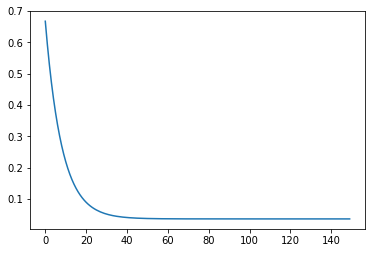

In [17]:
x = [i for i in range(epochs)]
plt.plot(x,err)

In [18]:
y_pred = x_test.dot(b)

In [19]:
y_pred

array([-0.52195779, -0.49306048, -0.37041068, ..., -0.38567961,
       -0.32512716, -0.51240147])

In [20]:
std.inverse_transform(y_pred)

array([0.06512304, 0.67577421, 3.26758131, ..., 2.94492182, 4.22450202,
       0.26706495])